# Simple Linear Regression

# Assignment-4, (2).Salary dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

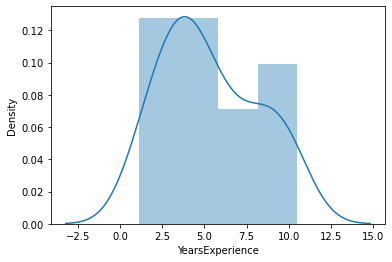

In [5]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

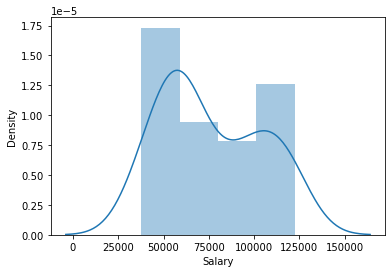

In [6]:
sns.distplot(df['Salary'])

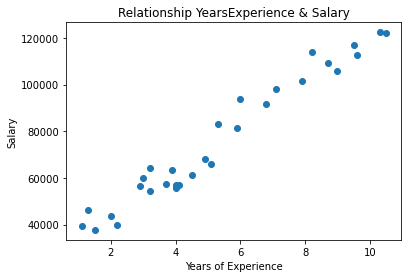

In [7]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.title("Relationship YearsExperience & Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Data Transformation

1. Log Transformation: Transform the response variable from y to log(y).

In [8]:
#create log-transformed data
df_log = np.log(df)

Text(0.5, 1.0, 'Log transformed data')

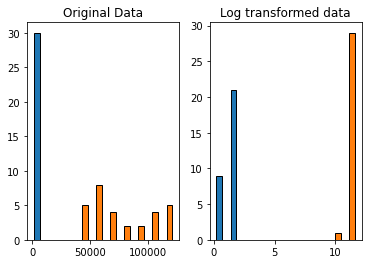

In [9]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log transformed data')

2. Square Root Transformation: Transform the response variable from y to √y.

In [10]:
#create log-transformed data
df_log = np.sqrt(df)

Text(0.5, 1.0, 'Square Root Transformed Data')

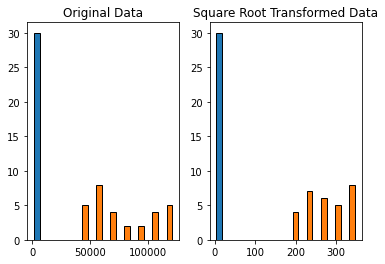

In [11]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

3. Cube Root Transformation: Transform the response variable from y to y1/3.

In [12]:
#create log-transformed data
df_log = np.cbrt(df)

Text(0.5, 1.0, 'Cube Root Transformed Data')

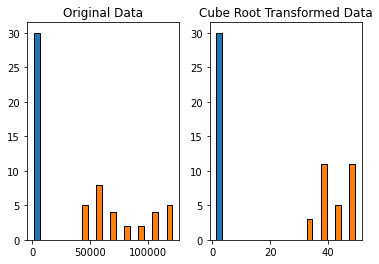

In [13]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

4. Box Cox transformation in Python

In [14]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df.insert(len(df.columns), 'B_Boxcox', 
              boxcox(df.iloc[:, 0])[0])

Text(0.5, 1.0, 'Boxcox data')

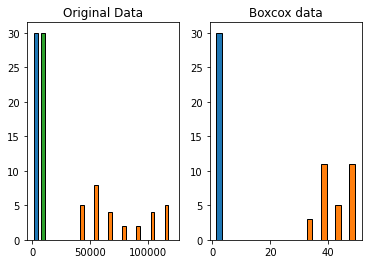

In [15]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Boxcox data')

# Correlation Analysis

In [16]:
df.corr()

,YearsExperience,Salary,B_Boxcox
YearsExperience,1.000000,0.978242,0.987782
Salary,0.978242,1.000000,0.962444
B_Boxcox,0.987782,0.962444,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

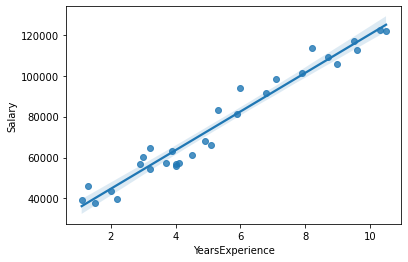

In [17]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

# Model Building

In [18]:
model = smf.ols('Salary~YearsExperience',data=df).fit()

# Model Testing

In [19]:
#Finding Cofficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
#Finding p_values and t_values
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [21]:
#Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [22]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [23]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [24]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [25]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# Linear Regression with Sciket_learn librarries

In [26]:
df

,YearsExperience,Salary,B_Boxcox
0,1.1,39343.0,0.097408
1,1.3,46205.0,0.278674
2,1.5,37731.0,0.445296
3,2.0,43525.0,0.814970
4,2.2,39891.0,0.948515
5,2.9,56642.0,1.369994
6,3.0,60150.0,1.425465
7,3.2,54445.0,1.533461
8,3.2,64445.0,1.533461
9,3.7,57189.0,1.788316


In [27]:
X = df[["YearsExperience"]]
Y = df["Salary"]

In [28]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [30]:
model.intercept_

25792.200198668717

In [31]:
model.coef_

array([9449.96232146])

In [32]:
y_pred = model.predict(X)

In [33]:
pd.DataFrame({"Actual":Y,"Predicted":y_pred,"Residual":Y-y_pred})

,Actual,Predicted,Residual
0,39343.0,36187.158752,3155.841248
1,46205.0,38077.151217,8127.848783
2,37731.0,39967.143681,-2236.143681
3,43525.0,44692.124842,-1167.124842
4,39891.0,46582.117306,-6691.117306
5,56642.0,53197.090931,3444.909069
6,60150.0,54142.087163,6007.912837
7,54445.0,56032.079627,-1587.079627
8,64445.0,56032.079627,8412.920373
9,57189.0,60757.060788,-3568.060788


# Metrics

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(Y,y_pred)

31270951.722280957

In [36]:
from sklearn.metrics import r2_score
r2_score(Y,y_pred)

0.9569566641435086

In [37]:
df

,YearsExperience,Salary,B_Boxcox
0,1.1,39343.0,0.097408
1,1.3,46205.0,0.278674
2,1.5,37731.0,0.445296
3,2.0,43525.0,0.814970
4,2.2,39891.0,0.948515
5,2.9,56642.0,1.369994
6,3.0,60150.0,1.425465
7,3.2,54445.0,1.533461
8,3.2,64445.0,1.533461
9,3.7,57189.0,1.788316


In [38]:
model.predict([[8]])

array([101391.89877031])

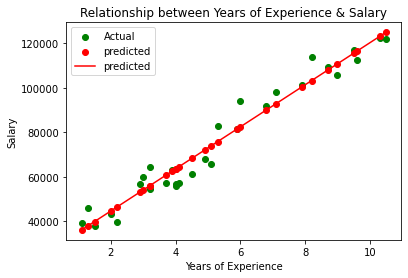

In [39]:
plt.scatter(df["YearsExperience"],df["Salary"],color='green',label="Actual")
plt.scatter(df["YearsExperience"],y_pred,color='red',label="predicted")
plt.plot(df["YearsExperience"],y_pred,color='red',label="predicted")

plt.title("Relationship between Years of Experience & Salary")
plt.xlabel("Years of Experience")
plt.legend()
plt.ylabel("Salary")
plt.show()